In [1]:
#...Por Caroliny Suque...02/12/2021....LABTDF
from intersect import intersection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 

In [2]:
# selecionar o nome do diretório que está localizado o arquivo, ele vai ler todos os arquivos txt da pasta
path = r'/home/caroliny/Documentos/datavale/perfisdesgastados' 
os.chdir(path) 
  
for file in os.listdir(): 
    
    if file.endswith(".txt"): 
        file_path = f"{path}/{file}"
        data = pd.read_table(file_path,header=None)
# se quiser ler um arquivo txt especifico apenas tire do for o 'data' e escreva o 'file_path'
# assim é preciso que o txt esteja na sua pasta onde está o codigo salvo

In [3]:
data

,0,1,2,3,4,5,6,7
0,-0.070000,0.006145,-0.070000,0.006145,-0.070000,0.006145,-0.070000,0.006145
1,-0.069925,0.006638,-0.069924,0.006638,-0.069924,0.006638,-0.069925,0.006638
2,-0.069842,0.007130,-0.069842,0.007131,-0.069842,0.007131,-0.069842,0.007129
3,-0.069752,0.007620,-0.069752,0.007622,-0.069752,0.007622,-0.069752,0.007620
4,-0.069656,0.008110,-0.069655,0.008112,-0.069655,0.008112,-0.069656,0.008109
...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,0.075077,-0.016482,0.075231,-0.017973
361,NaN,NaN,NaN,NaN,0.075144,-0.016977,0.075251,-0.018471
362,NaN,NaN,NaN,NaN,0.075195,-0.017474,NaN,NaN
363,NaN,NaN,NaN,NaN,0.075231,-0.017972,NaN,NaN


In [3]:
flange_height = []
flange_width = []
thread_hollow = []
thread_maximum = []
x_thread_maximum = []
y_thread_maximum = []

tapeline = 0 # tapeline que para os perfis do simpack está no zero

gagepoint = 0.026930 - 0.010 # medida L3 que é do topo do friso para baixo

N = -0.01
O = 0.03

P = 0.00
Q = 0.05

for col1,col2 in zip(range(0,len(data.columns),2),range(1,len(data.columns),2)):
    
    #profile = data.iloc[:,col1:col2]
    x_profile = data[col1]
    y_profile = data[col2]

#..............................................................................................

    y_tapeline = list(np.arange(min(y_profile),max(y_profile),0.001))
    x_tapeline = np.full(len(y_tapeline),tapeline)

    x_center,y_center = intersection(x_profile, y_profile, x_tapeline, y_tapeline)

    y_flangetop = max(y_profile)

    flange_height.append(y_flangetop - y_center[0])

#.............................................................................................
    
    y_gagepoint = y_flangetop - gagepoint
    
    x_l3 = list(np.arange(min(x_profile),max(x_profile),0.001)) 
    y_l3 = np.full(len(x_l3),y_gagepoint)
    
    x_width,y_width = intersection(x_profile, y_profile, x_l3, y_l3)

    flange_width.append(x_width.max() - x_width.min())

#............................................................................................
   
    x_1 =  [i for j, i in enumerate(x_profile) if (i >= N) & (i <= O)]
    idx_1 = [j for j, i in enumerate(x_profile) if (i >= N) & (i <= O)]
    
    y_1 = [i for j, i in enumerate(y_profile) if (j >= min(idx_1)) & (j <= max(idx_1))]

    x_2 =  [i for j, i in enumerate(x_profile) if (i >= P) & (i <= Q)]
    idx_2 = [j for j, i in enumerate(x_profile) if (i >= P) & (i <= Q)]
    
    y_2 = [i for j, i in enumerate(y_profile) if (j >= min(idx_2)) & (j <= max(idx_2))]
    
    if col1 == 0:
        thread_hollow.append(0)
    else:
        thread_hollow.append(max(y_2) - min(y_1))
    
#............................................................................................
       
    x_original = data[0]
    y_original = data[1]

    y_dif = abs(y_original - y_profile)

    idx_3 =  [j for j, i in enumerate(y_dif) if i == max(y_dif)]
    x_3 = [i for j, i in enumerate(x_profile) if j == idx_3[0]]
    y_3 = [i for j, i in enumerate(y_profile) if j == idx_3[0]]
    
    if col1 == 0:
        thread_maximum.append(0)
        x_thread_maximum.append(0)
        y_thread_maximum.append(0)
    else:
        thread_maximum.append(max(y_dif))
        x_thread_maximum.append(x_3[0])
        y_thread_maximum.append(y_3[0])
    

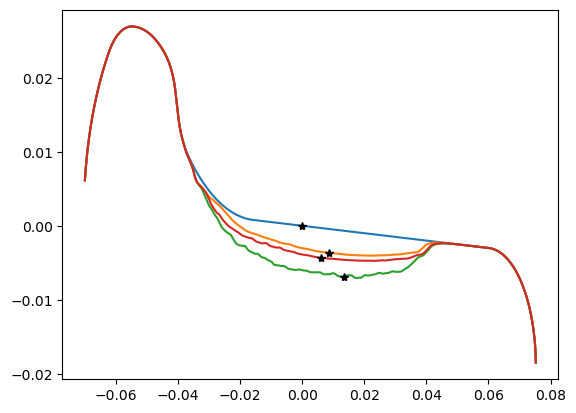

In [4]:
y_new = []
for col1,col2 in zip(range(0,len(data.columns),2),range(1,len(data.columns),2)):
    
    x_original = data[0]
    y_original = data[1]
    
    x_profile = data[col1]
    y_profile = data[col2]
    
    y_new = y_original + y_thread_maximum[1]
    
    plt.plot(x_profile,y_profile)
    
    
plt.plot(x_thread_maximum,y_thread_maximum,'*k')
#plt.plot(x_profile,y_new)
#plt.xlim(0.013, 0.014)   
plt.show()

In [5]:
indice = pd.DataFrame(list(zip(flange_height,flange_width,thread_hollow,thread_maximum,x_thread_maximum)),columns=['flange_height', 'flange_width', 'thread_hollow', 'thread_maximum', 'x_thread_maximum'])*1000

In [6]:
indice

,flange_height,flange_width,thread_hollow,thread_maximum,x_thread_maximum
0,26.929605,31.954316,0.00000,0.000000,0.00000
1,29.949906,31.805907,1.75850,3.175131,8.72560
2,32.938970,31.810668,4.67822,6.127786,13.38860
3,30.812183,31.803230,2.38400,3.945736,5.94596
